In [1]:
import sys
sys.path.append('../')

import glob
import copy
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

from infer import InferenceWrapper

### Load the model

In [2]:
args_dict = {
    'project_dir': '../',
    'init_experiment_dir': '../runs/vc2-hq_adrianb_paper_main',
    'init_networks': 'identity_embedder, texture_generator, keypoints_embedder, inference_generator',
    'init_which_epoch': '2225',
    'num_gpus': 1,
    'experiment_name': 'vc2-hq_adrianb_paper_enhancer',
    'which_epoch': '1225',
    'spn_networks': 'identity_embedder, texture_generator, keypoints_embedder, inference_generator, texture_enhancer',
    'enh_apply_masks': False,
    'inf_apply_masks': False}

In [3]:
module = InferenceWrapper(args_dict)

Constructing DeepLabv3+ model...
Number of classes: 20
Output stride: 16
Number of Input Channels: 3
unexpected key "source_graph_2_fea.node_fea_for_res" in state_dict
unexpected key "source_graph_2_fea.node_fea_for_hidden" in state_dict
unexpected key "source_graph_2_fea.weight" in state_dict
unexpected key "source_skip_conv.0.weight" in state_dict
unexpected key "source_skip_conv.0.bias" in state_dict
unexpected key "source_semantic.weight" in state_dict
unexpected key "source_semantic.bias" in state_dict
unexpected key "middle_semantic.weight" in state_dict
unexpected key "middle_semantic.bias" in state_dict
unexpected key "middle_source_featuremap_2_graph.pre_fea" in state_dict
unexpected key "middle_source_featuremap_2_graph.weight" in state_dict
unexpected key "middle_source_graph_conv1.weight" in state_dict
unexpected key "middle_source_graph_conv2.weight" in state_dict
unexpected key "middle_source_graph_conv3.weight" in state_dict
unexpected key "middle_source_graph_2_fea.node

### Calculate poses, segmentation and do the inference

In [4]:
input_data_dict = {
    'source_imgs': np.asarray(Image.open('images/target.jpg')), # H x W x 3
    'target_imgs': np.asarray(Image.open('images/source.jpg'))[None]} # B x H x W x # 3

output_data_dict = module(input_data_dict)

/home/mil/r-ishikawa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/torch/nn/functional.py:2796: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/mil/r-ishikawa/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/torch/nn/functional.py:3226: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "


In [5]:
def to_image(img_tensor, seg_tensor=None):
    img_array = ((img_tensor.clamp(-1, 1).cpu().numpy() + 1) / 2).transpose(1, 2, 0) * 255
    
    if seg_tensor is not None:
        seg_array = seg_tensor.cpu().numpy().transpose(1, 2, 0)
        img_array = img_array * seg_array + 255. * (1 - seg_array)

    return Image.fromarray(img_array.astype('uint8'))

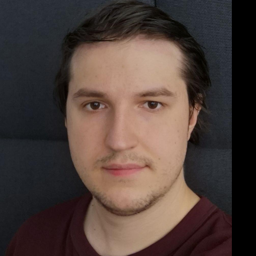

In [6]:
source_img = to_image(output_data_dict['source_imgs'][0, 0])
source_img

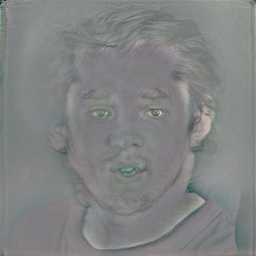

In [7]:
hf_texture = to_image(output_data_dict['pred_enh_tex_hf_rgbs'][0, 0])
hf_texture

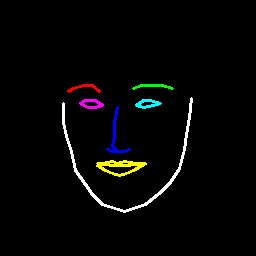

In [8]:
target_pose = to_image(output_data_dict['target_stickmen'][0, 0])
target_pose

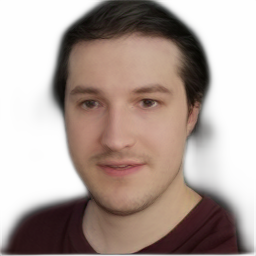

In [9]:
pred_img = to_image(output_data_dict['pred_enh_target_imgs'][0, 0], output_data_dict['pred_target_segs'][0, 0])
pred_img